# Regresión lineal usando Tensorflow

In [11]:
import numpy as np
import tensorflow as tf
from utils import load_regression_data

## Funciones 

Hipotesis
la hipotesis $h$ esta definida por $h(x) = \Theta^T * X$

Funcion de costo
La funcion de costo $J$ esta definida por $J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2$

Gradiente del costo con respecto a los parametros
El gradiente esta dado por $\frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m}(h(x) - y)x_j$ para un solo parametro

Para una operacion vectorial podemos usar: $\nabla J(\Theta) = \frac{1}{m}(h(x) - y) * x^T$



In [5]:
def h(X, theta):
    'Hipotesis para la regresion lineal, devuelve una matriz de (1, m)'
    return np.dot(np.transpose(theta), X)

def J(X, y, theta):
    'Funcion de costo, devuelve un escalar'
    m = X.shape[1]
    return (1 / (2 * m)) * np.sum(np.square(h(X, theta) - y))

def dJ(X, y, theta):
    'Gradiente del costo devuelve una matriz de (n + 1, 1)'
    m = X.shape[1]
    return (1 / m) * np.dot((h(X, theta) - y), np.transpose(X)).reshape((-1, 1))


## Importar y preprocesar el dataset


In [12]:
X, y = load_regression_data()
m = X.shape[1]
unos = np.ones((1, m))
X = np.append(unos, X, axis=0)

X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

## Entrenamiento


In [13]:
alpha = 0.1
iteraciones = 500

# theta = np.random.random((X.shape[0], 1))
theta = tf.Variable(tf.random.uniform([X.shape[0], 1]), dtype=tf.float32)
registro_grads = []
registro_J = []
J_init = J(X, y, theta)
print(f'Costo inicial: {J_init}')
registro_J.append(J_init)



ValueError: setting an array element with a sequence.

In [8]:
for i in range(iteraciones):
    # calcular la gradiente
    dtheta = dJ(X, y, theta)
    # actualizar parametros (descenso de gradiente)
    theta = theta - alpha * dtheta
    
    registro_J.append(J(X, y, theta))

print(f'Costo final: {J(X, y, theta)}')


Costo final: 2287.43874055488


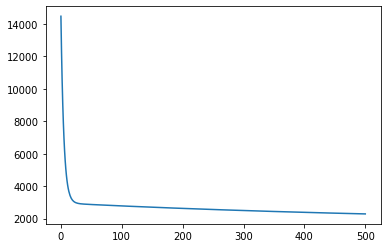

In [9]:
import matplotlib.pyplot as plt
it = list(range(iteraciones + 1))
plt.plot(it, registro_J)
plt.show()